In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pdf2image import convert_from_path
import random as rng

In [22]:
pages = convert_from_path('C:/Users/aadam/Documents/Github/AutoDataMining/Image Recognition/res/articles/paper5.pdf', 500)
pages[1].save('C:/Users/aadam/Documents/Github/AutoDataMining/Image Recognition/res/articles/out.png', 'PNG')

done1
5523.5
58410.0
95943.0
89433.0
8.5
90828.5
94468.0
46.0
44.5
180.5
92731.0
73216.5
92713.5
76.5
72842.5
7.5
18196.0
92871.5
80550.0
24.0
10206.5
100599.5
15.5
2846.0
9680.0
7469.5
14167.5
16332.5
14802.0
14829.0
11683.5
94568.0
22.0
6297.0
15676.0
14539.5
13401.0
15592.5
11941.5
8143.5
89039.0
10.0
36.0
61.0
35.0
93386.5
2.0
80.5
66.0
90020.0
17.5
90276.5
73.5
27174.0
95096.5
4.0
194.5
7672.0
7135.0
25740.5
4367.0
10342.5
21838.0
10772.5
4.0
24604.0
91718.0
94.5
53.0
6147.0
20063.0
24054.0
29356.5
9568.0
79339.0
11.0
70293.0
14.0
2.0
19171.5
89695.0
2.0
90438.5
8.5
90196.5
10.0
18.0
90706.5
4536.0
16084.0
10096.5
24793.5
39.5
12676.0
11294.5
7609.0
88801.0
10.0
36.0
91958.5
91032.5
97926.0
66.0
98921.5
21.5
15.0
92555.5
28.5
94285.5
16.5
7.0
39.5
62.5
16585.0
6767.5
17485.0
18028.5
18209.0
11112.5
92067.0
89141.5
25.0
100044.0
57728.5
99022.0
16.5
7.0
2.0
14500.0
13567.0
8088.5
17981.5
18162.0
16471.5
62003.5
31.5
28833.5
90856.5
2.0
89107.5
8.0
23.5
8.0
89455.0
35.5
45.0
66.5
92

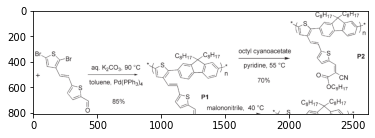

In [90]:

# Load image, grayscale, Otsu's threshold
image = cv2.imread('C:/Users/aadam/Documents/Github/AutoDataMining/Image Recognition/res/articles/out.png', 1)
print("done1")
original = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Dilate with horizontal kernel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20,10))
dilate = cv2.dilate(thresh, kernel, iterations=2)

# Find contours and remove non-diagram contours
contours, _ = cv2.findContours(dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for i, c in enumerate(contours):
    x,y,w,h = cv2.boundingRect(c)
    area = cv2.contourArea(c)
    print(area)
    if w/h > 1 and area > 1000:
        cv2.drawContours(dilate, [c], -1, (0,0,0), -1)

# Iterate through diagram contours and form single bounding box
boxes = []
contours = cv2.findContours(dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    boxes.append([x,y, x+w,y+h])

boxes = np.asarray(boxes)
x = np.min(boxes[:,0])
y = np.min(boxes[:,1])
w = np.max(boxes[:,2]) - x
h = np.max(boxes[:,3]) - y

# Extract ROI
cv2.rectangle(image, (x,y), (x + w,y + h), (36,255,12), 3)
ROI = original[y:y+h, x:x+w]
cv2.imwrite("C:/Users/aadam/Documents/Github/AutoDataMining/Image Recognition/res/articles/image.png", ROI)
print("4")
#plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
#plt.imshow(cv2.cvtColor(dilate, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(ROI, cv2.COLOR_BGR2RGB))
#cv2.waitKey(20)
print("5")

done1
1
11690.5
107353.5
302707.0
1311419.0
13.0
45039.5
1252811.5
3413437.5
2.0
10.5
2.0
722.0
23.0
22.0
14.0
12.5
166.0
1484106.5
115.0
5.5
345.5
198.5
28.0
69.5
117.0
2332076.5
944.5
537.5
453.5
364.5
61.5
288.0
125510.0
9936.0
13444.0
93111.5
202839.0
1407.5
13.0
292.5
286.5
271.5
13452.0
9450.0
13345.0
6519.0
144666.0
2.0
9994.5
276659.5
1354.0
258.0
270.5
203.0
91824.0
4.0
2.0
86377.0
208212.5
294.0
840.0
94.0
79.0
106.0
26277.5
40065.0
11690.5
107353.5
302707.0
1311419.0
13.0
45039.5
1252811.5
3413437.5
2.0
10.5
2.0
722.0
23.0
22.0
14.0
12.5
166.0
1484106.5
115.0
5.5
345.5
198.5
28.0
69.5
117.0
2332076.5
944.5
537.5
453.5
364.5
61.5
288.0
125510.0
9936.0
13444.0
93111.5
202839.0
1407.5
13.0
292.5
286.5
271.5
13452.0
9450.0
13345.0
6519.0
144666.0
2.0
9994.5
276659.5
1354.0
258.0
270.5
203.0
91824.0
4.0
2.0
86377.0
208212.5
294.0
840.0
94.0
79.0
106.0
26277.5
40065.0
4
5


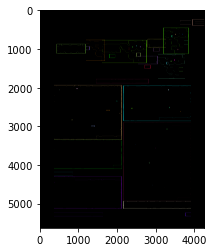

In [81]:

# Load image, grayscale, Otsu's threshold
image = cv2.imread('C:/Users/aadam/Documents/Github/AutoDataMining/Image Recognition/res/articles/out.png', 0)
print("done1")
original = image.copy()
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV,11,2)
# Dilate with horizontal kernel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15,15))
dilate = cv2.dilate(thresh, kernel, iterations=2)
erode = cv2.erode(dilate, kernel, iterations = 2)
dilate = cv2.dilate(erode, kernel, iterations=4)
print("1")
# Find contours and remove non-diagram contours
canny_output = cv2.Canny(dilate, 10, 40)

# Find contours and remove non-diagram contours
contours, _ = cv2.findContours(dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for i, c in enumerate(contours):
    x,y,w,h = cv2.boundingRect(c)
    area = cv2.contourArea(c)
    print(area)
    if w/h > 2 and area > 10000000:
        cv2.drawContours(dilate, [c], -1, (0,0,0), -1)

# Identify every contour        
contours, _ = cv2.findContours(dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_poly = [None]*len(contours)
boundRect = [None]*len(contours)
centers = [None]*len(contours)
radius = [None]*len(contours)
for i, c in enumerate(contours):
    contours_poly[i] = cv2.approxPolyDP(c, 3, True)
    boundRect[i] = cv2.boundingRect(contours_poly[i])
    print(cv2.contourArea(c))
    centers[i], radius[i] = cv2.minEnclosingCircle(contours_poly[i])
drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)
# Draw polygonal contour + bonding rects + circles
for i in range(len(contours)):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv2.drawContours(drawing, contours_poly, i, color)
    cv2.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
        (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)
plt.imshow(drawing)

# Extract ROI
cv2.rectangle(image, (x,y), (x + w,y + h), (36,255,12), 3)
ROI = original[y:y+h, x:x+w]
print("4")
cv2.imwrite("C:/Users/aadam/Documents/Github/AutoDataMining/Image Recognition/res/articles/image.png", drawing)
#plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
#cv2.imshow('Test', cv2.cvtColor(dilate, cv2.COLOR_BGR2RGB))
#cv2.imshow('', cv2.cvtColor(canny_output, cv2.COLOR_BGR2RGB))
#plt.imshow(cv2.cvtColor(ROI, cv2.COLOR_BGR2RGB))
#cv2.waitKey(10000)
#cv2.destroyAllWindows()
print("5")